In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

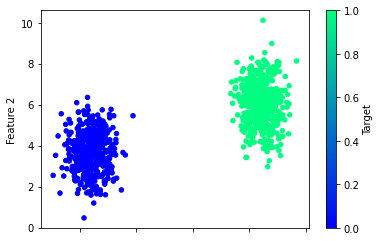

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))


# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 3s 4ms/step - loss: 0.8124 - accuracy: 0.4198
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7981 - accuracy: 0.4117
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7629 - accuracy: 0.4471
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7771 - accuracy: 0.4217
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7521 - accuracy: 0.4974
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7273 - accuracy: 0.5149
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7285 - accuracy: 0.5062
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.5362
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.5241
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5775
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9607
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9656
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9491
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9627
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9525
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9561
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9666
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9668
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9644
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9731
Epoch 93/100


<AxesSubplot:>

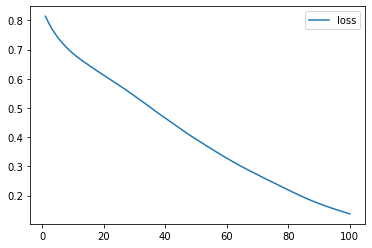

In [8]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

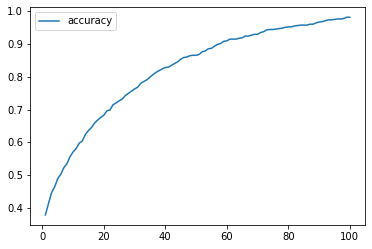

In [9]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [10]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1237 - accuracy: 0.9880
Loss: 0.12365729361772537, Accuracy: 0.9879999756813049


In [11]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict(new_X_scaled)

array([[0.1606614],
       [0.9977542],
       [0.1606614],
       [0.9993658],
       [0.1606614],
       [0.1606614],
       [0.9860422],
       [0.8478565],
       [0.9798511],
       [0.1606614]], dtype=float32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

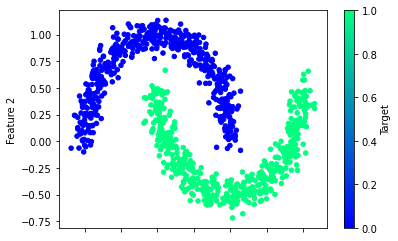

In [12]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [13]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [14]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.7617 - accuracy: 0.2933
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5149 - accuracy: 0.3040
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3463 - accuracy: 0.3253
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2328 - accuracy: 0.3493
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1476 - accuracy: 0.3627
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0828 - accuracy: 0.3867
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0305 - accuracy: 0.4000
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9868 - accuracy: 0.4200
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9505 - accuracy: 0.4373
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9194 - accuracy: 0.4507
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.7813
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.7880
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.7893
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.7907
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7920
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.7947
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.7960
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.7960
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.7973
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.7987
Epoch 93/100


<AxesSubplot:>

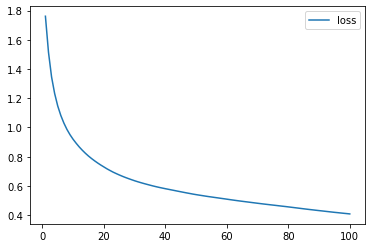

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

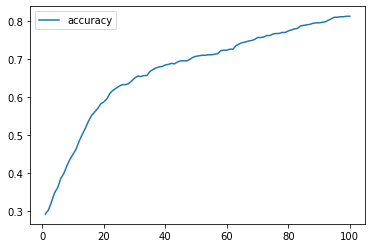

In [16]:
# Plot the loss
history_df.plot(y="accuracy")

In [17]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [18]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [20]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 0.1681 - accuracy: 0.9278
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1939 - accuracy: 0.9160
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1812 - accuracy: 0.9261
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 0.9236
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1751 - accuracy: 0.9197
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1998 - accuracy: 0.9041
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9285
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9176
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9163
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9387
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9786
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9773
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9724
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.9728
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9714
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.9669
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9755
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9699
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9618
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9673
Epoch 92/100


<AxesSubplot:>

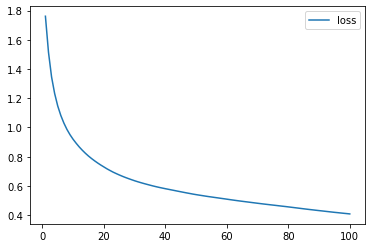

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

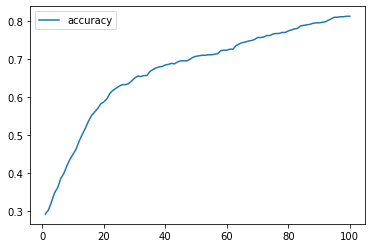

In [22]:
# Plot the loss
history_df.plot(y="accuracy")